Tên các cột trong DataFrame: ['Close', 'Volume']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1469 non-null   float64
 1   Volume  1469 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 34.4 KB
None
Số lượng giá trị thiếu trong mỗi cột:
Close     0
Volume    0
dtype: int64


C:\Users\pc081\AppData\Local\Temp\ipykernel_20896\784512240.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Điền giá trị thiếu bằng giá trị trước đó


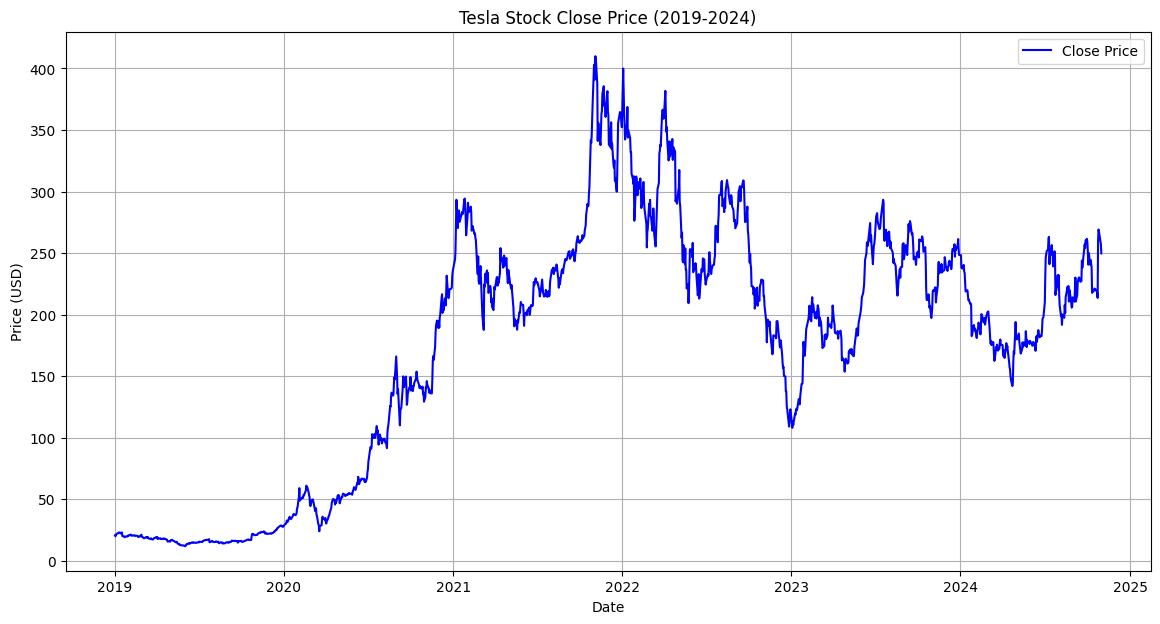

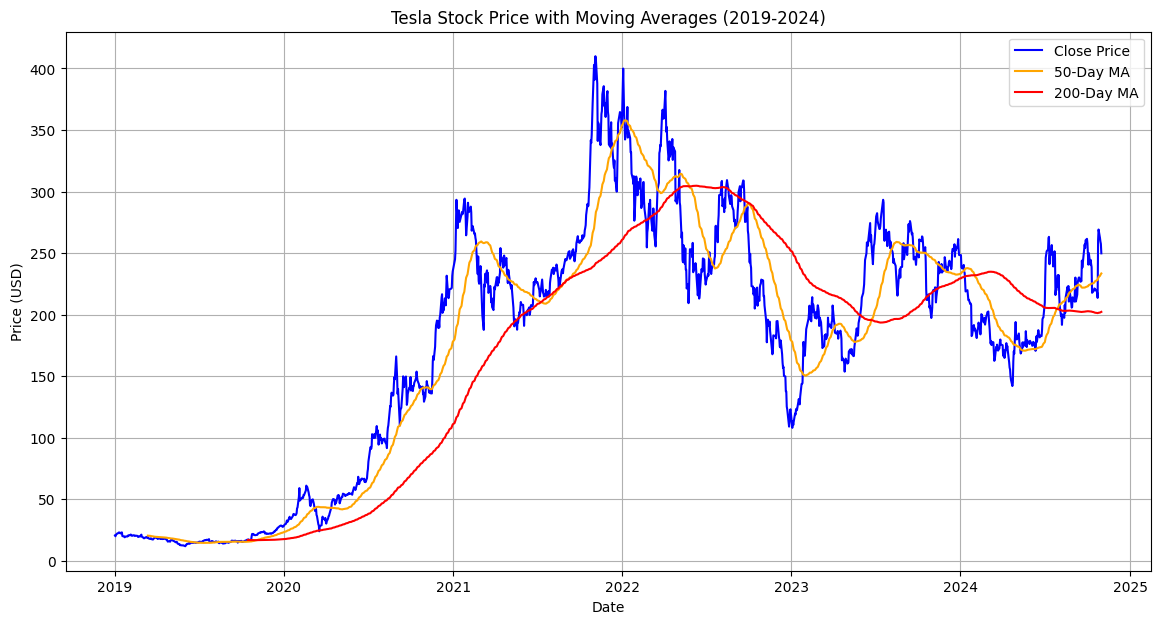

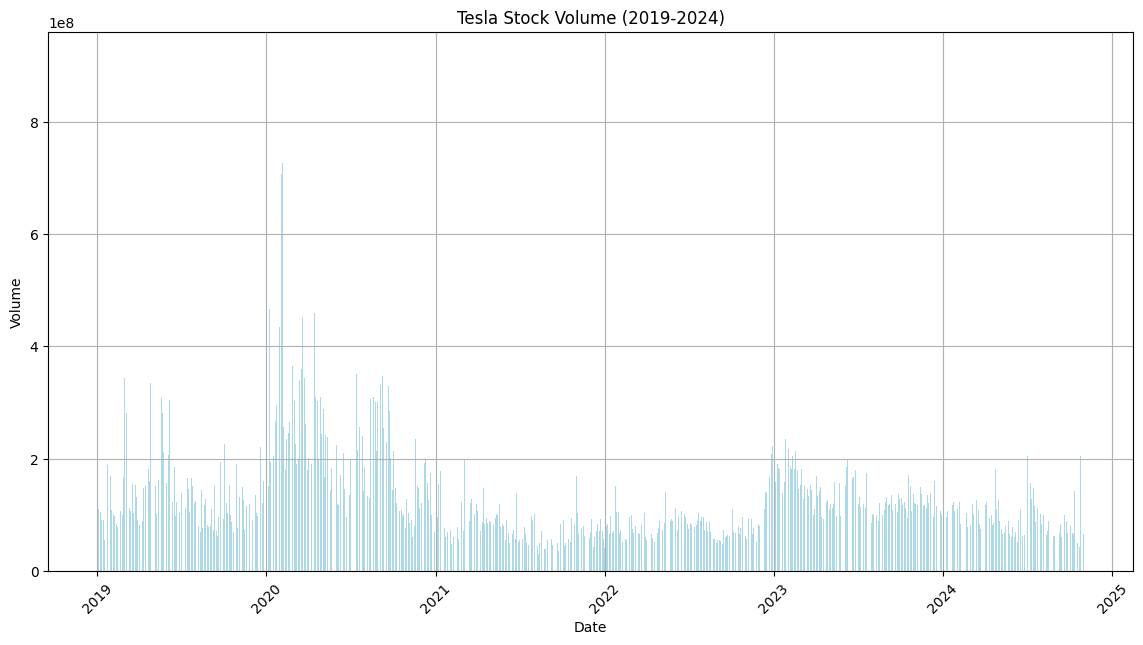

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV
# Chỉ định định dạng ngày tháng dd-mm-yy khi đọc file
df = pd.read_csv('Get_data/Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# 2. Kiểm tra tên các cột
print("Tên các cột trong DataFrame:", df.columns.tolist())

# 3. Làm sạch tên cột để loại bỏ khoảng trắng
df.columns = df.columns.str.strip()

# 4. Kiểm tra lại thông tin DataFrame
print(df.info())

# 5. Kiểm tra có giá trị thiếu hay không
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 6. Xử lý giá trị thiếu (nếu có)
df = df.fillna(method='ffill')  # Điền giá trị thiếu bằng giá trị trước đó

# 7. Vẽ biểu đồ giá đóng cửa (Close Price)
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Tesla Stock Close Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# 8. Thêm các đường trung bình động (MA 50 và MA 200)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# 9. Vẽ biểu đồ giá đóng cửa cùng với MA 50 và MA 200
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['MA200'], label='200-Day MA', color='red')
plt.title('Tesla Stock Price with Moving Averages (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# 10. Vẽ biểu đồ khối lượng giao dịch (Volume)
if 'Volume' in df.columns:
    plt.figure(figsize=(14, 7))
    plt.bar(df.index, df['Volume'], color='lightblue')
    plt.title('Tesla Stock Volume (2019-2024)')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
else:
    print("Cột 'Volume' không tồn tại trong dữ liệu.")


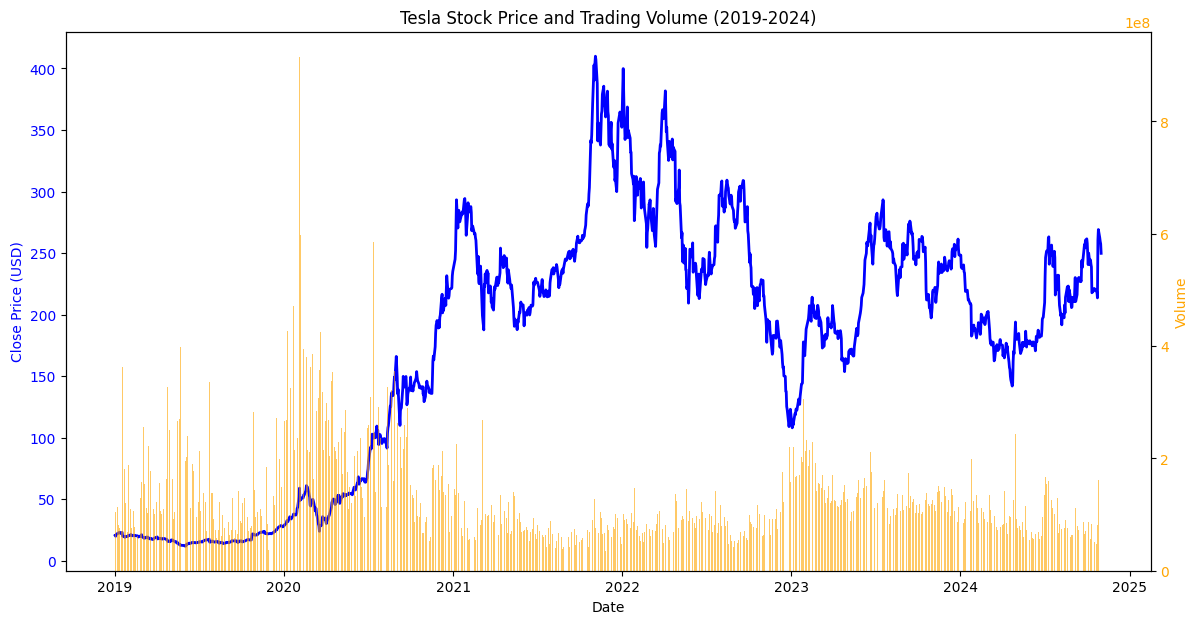

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('Get_data/Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# Vẽ biểu đồ giá cổ phiếu (Tesla Stock Price) với trục y bên trái
fig, ax1 = plt.subplots(figsize=(14, 7))

# Vẽ đường giá đóng cửa
ax1.plot(df.index, df['Close'], color='blue', label='Close Price', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Tesla Stock Price and Trading Volume (2019-2024)')

# Tạo trục y thứ hai cho Volume
ax2 = ax1.twinx()  
ax2.bar(df.index, df['Volume'], color='orange', alpha=0.6, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Hiển thị biểu đồ
plt.show()


                Close     Volume
Date                            
2019-01-02  20.674667  174879000
2019-01-03  20.024000  104478000
2019-01-04  21.179333  110911500
2019-01-07  22.330667  113268000
2019-01-08  22.356667  105127500


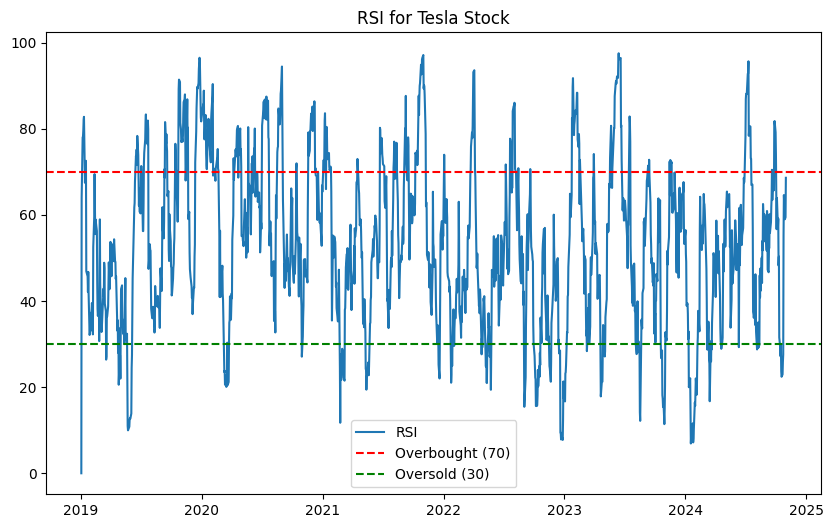

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('Get_data/Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# Kiểm tra cấu trúc dữ liệu
print(df.head())  # Hiển thị vài dòng đầu tiên của dữ liệu để xác định cột chứa giá đóng cửa

# Hàm tính RSI
def calculate_rsi(data, window=14):
    # Tính sự thay đổi giá giữa các phiên giao dịch
    delta = data.diff()
    
    # Tính mức tăng (positive changes) và mức giảm (negative changes)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Tính trung bình động của mức tăng và mức giảm trong khoảng window (thường là 14)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Tính RS (Relative Strength)
    rs = avg_gain / avg_loss
    
    # Tính RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Giả sử cột 'Close' chứa giá đóng cửa của cổ phiếu
# Kiểm tra tên cột chứa giá đóng cửa và thay thế nếu cần
df['RSI'] = calculate_rsi(df['Close'])  # Nếu cột giá đóng cửa là 'Close'

# Vẽ đồ thị RSI
plt.figure(figsize=(10, 6))
plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI for Tesla Stock')
plt.legend(loc='best')
plt.show()


Tên các cột trong DataFrame: ['Close']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1469 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB
None
Số lượng giá trị thiếu trong mỗi cột:
Close    0
dtype: int64


C:\Users\pc081\AppData\Local\Temp\ipykernel_20896\2988118472.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Điền giá trị thiếu bằng giá trị trước đó


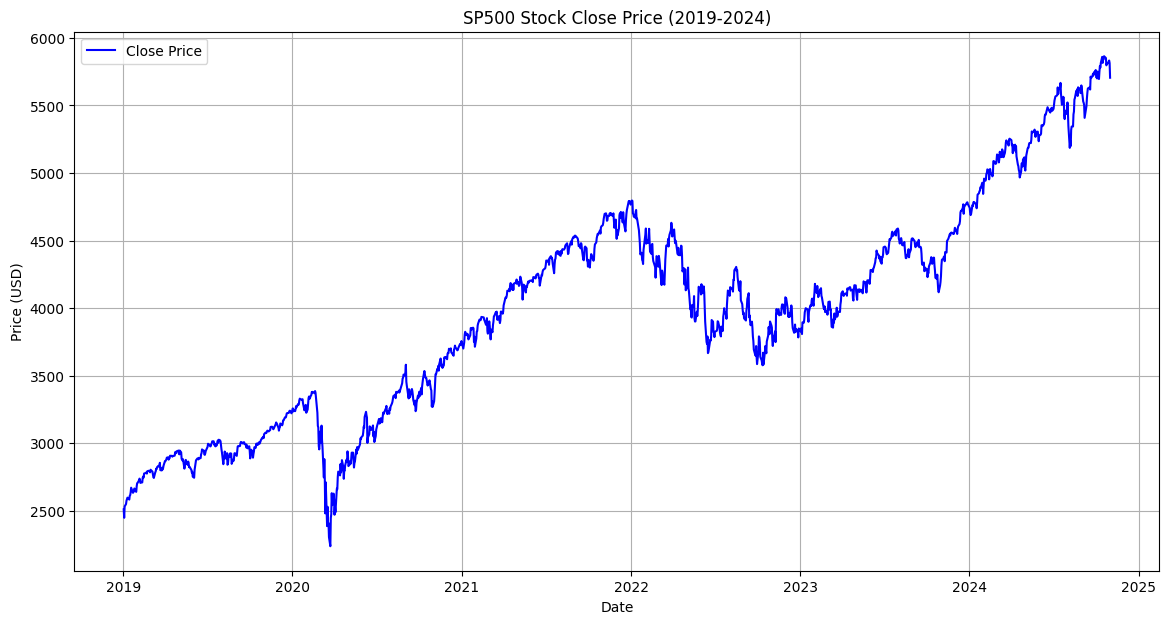

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV
# Chỉ định định dạng ngày tháng dd-mm-yy khi đọc file
df = pd.read_csv('Get_data/SP500_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# 2. Kiểm tra tên các cột
print("Tên các cột trong DataFrame:", df.columns.tolist())

# 3. Làm sạch tên cột để loại bỏ khoảng trắng
df.columns = df.columns.str.strip()

# 4. Kiểm tra lại thông tin DataFrame
print(df.info())

# 5. Kiểm tra có giá trị thiếu hay không
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 6. Xử lý giá trị thiếu (nếu có)
df = df.fillna(method='ffill')  # Điền giá trị thiếu bằng giá trị trước đó

# 7. Vẽ biểu đồ giá đóng cửa (Close Price)
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('SP500 Stock Close Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


Tên các cột trong DataFrame: ['Close']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1469 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB
None
Số lượng giá trị thiếu trong mỗi cột:
Close    0
dtype: int64


C:\Users\pc081\AppData\Local\Temp\ipykernel_20896\2261316198.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Điền giá trị thiếu bằng giá trị trước đó


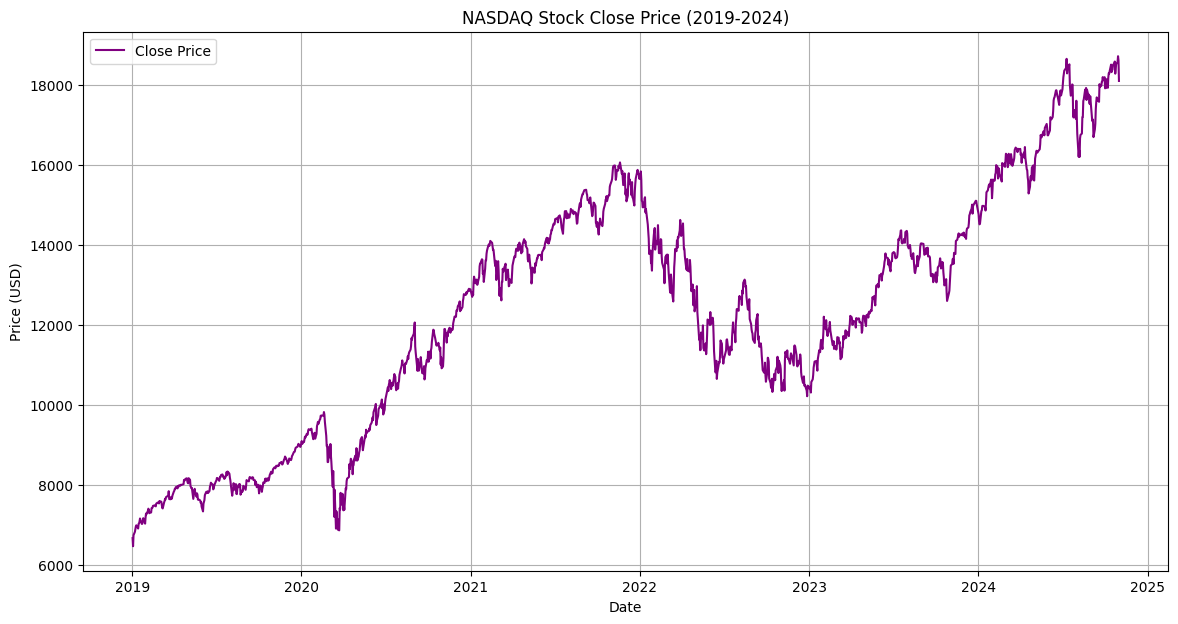

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV
# Chỉ định định dạng ngày tháng dd-mm-yy khi đọc file
df = pd.read_csv('Get_data/IXIC_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# 2. Kiểm tra tên các cột
print("Tên các cột trong DataFrame:", df.columns.tolist())

# 3. Làm sạch tên cột để loại bỏ khoảng trắng
df.columns = df.columns.str.strip()

# 4. Kiểm tra lại thông tin DataFrame
print(df.info())

# 5. Kiểm tra có giá trị thiếu hay không
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 6. Xử lý giá trị thiếu (nếu có)
df = df.fillna(method='ffill')  # Điền giá trị thiếu bằng giá trị trước đó

# 7. Vẽ biểu đồ giá đóng cửa (Close Price)
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='purple')
plt.title('NASDAQ Stock Close Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
